In [66]:
from tp_tree_source import*
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn import neighbors, model_selection
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import os
from sklearn.datasets import load_digits

Question 1

Question 2

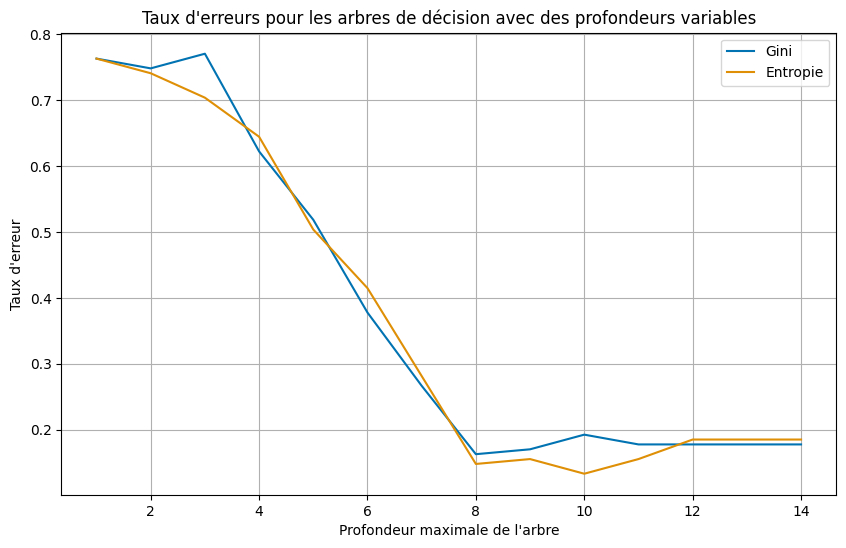

In [33]:
res = rand_checkers(n1=114, n2=114, n3=114, n4=114, sigma=0.1)
X, y = res[:,:2], res[:,2]


# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Plage de profondeurs d'arbre à tester
max_depths = range(1, 15)

# Listes pour stocker les taux d'erreur
errors_gini = []
errors_entropy = []

# Entraîner et tester les arbres de décision avec différentes profondeurs
for depth in max_depths:
    # Critère Gini
    clf_gini = DecisionTreeClassifier(max_depth=depth, criterion='gini', random_state=42)
    clf_gini.fit(X_train, y_train)
    y_pred_gini = clf_gini.predict(X_test)
    errors_gini.append(1 - accuracy_score(y_test, y_pred_gini))

    # Critère Entropie
    clf_entropy = DecisionTreeClassifier(max_depth=depth, criterion='entropy', random_state=42)
    clf_entropy.fit(X_train, y_train)
    y_pred_entropy = clf_entropy.predict(X_test)
    errors_entropy.append(1 - accuracy_score(y_test, y_pred_entropy))

# Tracer les taux d'erreur
plt.figure(figsize=(10, 6))
plt.plot(max_depths, errors_gini, label='Gini')
plt.plot(max_depths, errors_entropy, label='Entropie')
plt.xlabel('Profondeur maximale de l\'arbre')
plt.ylabel('Taux d\'erreur')
plt.title('Taux d\'erreurs pour les arbres de décision avec des profondeurs variables')
plt.legend()
plt.grid(True)
plt.show()

Question 3

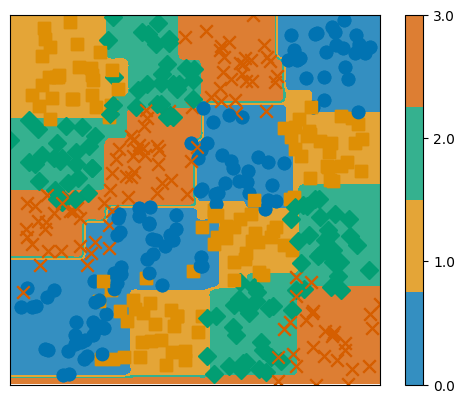

In [43]:
# Critère Gini
clf_gini = DecisionTreeClassifier(max_depth=8, criterion='gini', random_state=42)
clf_gini.fit(X_train, y_train)
y_pred_gini = clf_gini.predict(X_test)
errors_gini.append(1 - accuracy_score(y_test, y_pred_gini))
plot_2d(X, y)
frontiere_new(lambda x: clf_gini.predict(x.reshape(1, -1)), X, y)


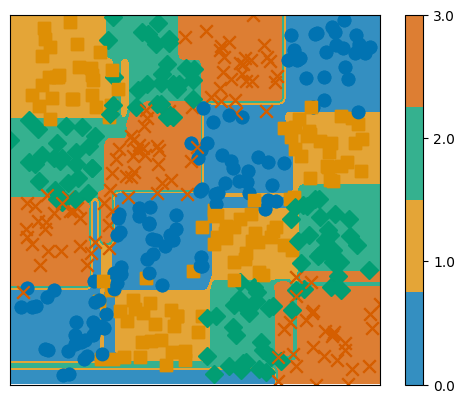

In [44]:
# Critère Entropie
clf_entropy = DecisionTreeClassifier(max_depth=10, criterion='entropy', random_state=42)
clf_entropy.fit(X_train, y_train)
y_pred_entropy = clf_entropy.predict(X_test)
errors_entropy.append(1 - accuracy_score(y_test, y_pred_entropy))
plot_2d(X, y)
frontiere_new(lambda x: clf_entropy.predict(x.reshape(1, -1)), X, y)

Question 4

In [45]:
tree.export_graphviz(clf_gini, out_file='tree_gini.dot', filled=True)
tree.export_graphviz(clf_entropy, out_file='tree_entropy.dot', filled=True)

In [67]:
tree.export_graphviz(clf_entropy, out_file="myEntropyTree.dot", filled=True)
os.system("dot -Tpdf myEntropyTree.dot -o myEntropyTree.pdf")
os.system("evince myEntropyTree.pdf")
tree.export_graphviz(clf_gini, out_file="myGiniTree.dot", filled=True)
os.system("dot -Tpdf myGiniTree.dot -o myGiniTree.pdf")
os.system("evince myGiniTree.pdf")

sh: dot: command not found
sh: evince: command not found
sh: dot: command not found
sh: evince: command not found


32512

Question 5

In [49]:
res_new = rand_checkers(40, 40, 40, 40)  # Générer de nouvelles données
X_new, y_new = res_new[:,:2], res_new[:,2]

y_pred_gini_new = clf_gini.predict(X_new)
y_pred_entropy_new = clf_entropy.predict(X_new)
error_rate_gini_new = 1 - accuracy_score(y_new, y_pred_gini_new)
error_rate_entropy_new = 1 - accuracy_score(y_new, y_pred_entropy_new)

print("Taux d'erreur pour Gini sur nouvelles données:", error_rate_gini_new)
print("Taux d'erreur pour Entropie sur nouvelles données:", error_rate_entropy_new)


Taux d'erreur pour Gini sur nouvelles données: 0.1875
Taux d'erreur pour Entropie sur nouvelles données: 0.18125000000000002


Question 6

In [58]:
digits = load_digits()
X_digits, y_digits = digits.data, digits.target
X_train_digits, X_test_digits, y_train_digits, y_test_digits = train_test_split(X_digits, y_digits, test_size=0.2, random_state=42)

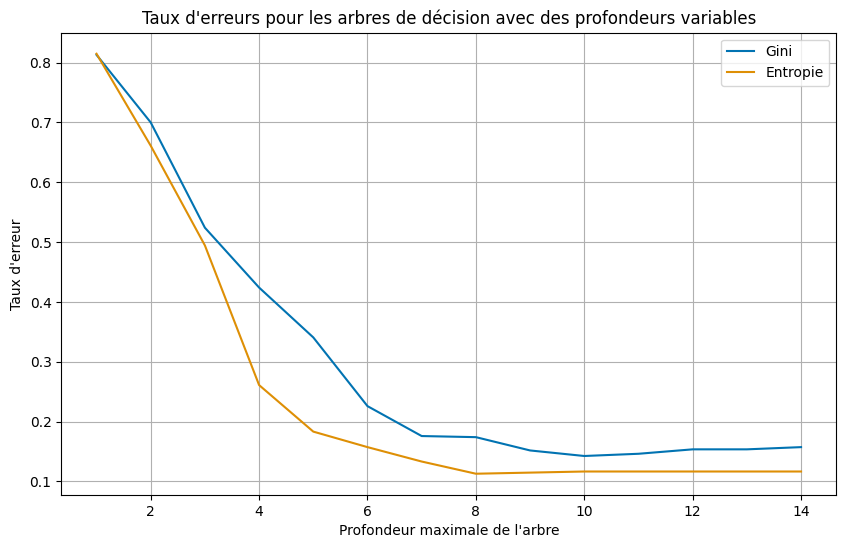

In [59]:
# Plage de profondeurs d'arbre à tester
max_depths = range(1, 15)

# Listes pour stocker les taux d'erreur
errors_gini = []
errors_entropy = []

# Entraîner et tester les arbres de décision avec différentes profondeurs
for depth in max_depths:
    # Critère Gini
    clf_gini = DecisionTreeClassifier(max_depth=depth, criterion='gini', random_state=42)
    clf_gini.fit(X_train_digits, y_train_digits)
    y_pred_gini = clf_gini.predict(X_test_digits)
    errors_gini.append(1 - accuracy_score(y_test_digits, y_pred_gini))

    # Critère Entropie
    clf_entropy = DecisionTreeClassifier(max_depth=depth, criterion='entropy', random_state=42)
    clf_entropy.fit(X_train_digits, y_train_digits)
    y_pred_entropy = clf_entropy.predict(X_test_digits)
    errors_entropy.append(1 - accuracy_score(y_test_digits, y_pred_entropy))

# Tracer les taux d'erreur
plt.figure(figsize=(10, 6))
plt.plot(max_depths, errors_gini, label='Gini')
plt.plot(max_depths, errors_entropy, label='Entropie')
plt.xlabel('Profondeur maximale de l\'arbre')
plt.ylabel('Taux d\'erreur')
plt.title('Taux d\'erreurs pour les arbres de décision avec des profondeurs variables')
plt.legend()
plt.grid(True)
plt.show()

In [74]:
# Entraîner les arbres de décision sur le jeu de données 'digits'
clf_gini_digits = DecisionTreeClassifier(max_depth=10, criterion='gini', random_state=42)
clf_entropy_digits = DecisionTreeClassifier(max_depth=8, criterion='entropy', random_state=42)

clf_gini_digits.fit(X_train_digits, y_train_digits)
clf_entropy_digits.fit(X_train_digits, y_train_digits)

# Exporter les arbres en format dot
tree.export_graphviz(clf_entropy_digits, out_file="tree_entropy_digits.dot", filled=True)
#os.system("dot -Tpdf tree_entropy_digits.dot -o tree_entropy_digits.pdf")
#os.system("evince tree_entropy_digits.pdf")

tree.export_graphviz(clf_gini_digits, out_file="tree_gini_digits.dot", filled=True)
#os.system("dot -Tpdf tree_gini_digits.dot -o tree_gini_digits.pdf")
#os.system("evince tree_gini_digits.pdf")

# Évaluation des modèles sur l'ensemble de test
y_pred_gini_digits = clf_gini_digits.predict(X_test_digits)
y_pred_entropy_digits = clf_entropy_digits.predict(X_test_digits)

error_rate_gini_digits = 1 - accuracy_score(y_test_digits, y_pred_gini_digits)
error_rate_entropy_digits = 1 - accuracy_score(y_test_digits, y_pred_entropy_digits)

print("Taux d'erreur pour Gini (digits):", error_rate_gini_digits)
print("Taux d'erreur pour Entropie (digits):", error_rate_entropy_digits)



Taux d'erreur pour Gini (digits): 0.1425925925925926
Taux d'erreur pour Entropie (digits): 0.11296296296296293
